In [94]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [102]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [31]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [17]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


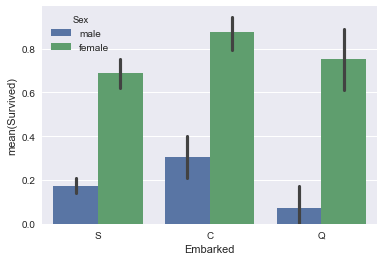

In [21]:
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=train);

In [33]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


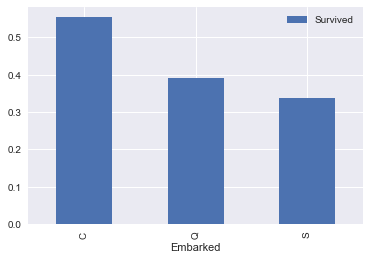

In [29]:
embark_pivot = train.pivot_table(index="Embarked",values="Survived")
embark_pivot.plot.bar()
plt.show()

<Container object of 3 artists>

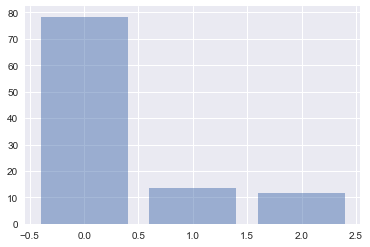

In [69]:
pclass = ['1', '2', '3']
fare_stdv = train[['Pclass', 'Fare']].groupby("Pclass").std()

index = np.arange(len(pclass))
plt.bar(index, fare_stdv["Fare"], align='center', alpha=0.5)


<Container object of 3 artists>

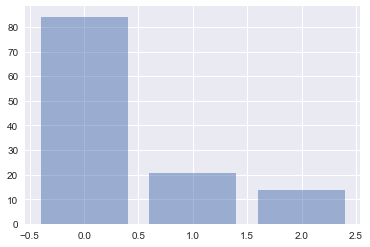

In [70]:
fare_mean = train[['Pclass', 'Fare']].groupby("Pclass").mean()

index = np.arange(len(pclass))
plt.bar(index, fare_mean["Fare"], align='center', alpha=0.5)

In [45]:
train[['Pclass', 'Fare']].groupby("Pclass").mean()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


NameError: name 'names' is not defined

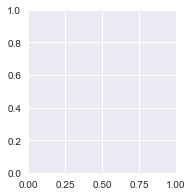

In [39]:
plt.figure(1, figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)

In [38]:
train.describe()
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [111]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [112]:
train.shape

(891, 12)

In [113]:
# Feature Selection
features_1 = train[["Pclass", "Sex", "Age", "SibSp", "Parch", "Embarked", "Survived"]]


In [121]:
features_1.shape
#print(train["Pclass"].isnull().sum())
#print(train["Embarked"].isnull().sum())

0
2


In [122]:
# Get rid of nan
features_1 = features_1.dropna()

In [123]:
features_1

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,22.0,1,0,S,0
1,1,female,38.0,1,0,C,1
2,3,female,26.0,0,0,S,1
3,1,female,35.0,1,0,S,1
4,3,male,35.0,0,0,S,0
6,1,male,54.0,0,0,S,0
7,3,male,2.0,3,1,S,0
8,3,female,27.0,0,2,S,1
9,2,female,14.0,1,0,C,1
10,3,female,4.0,1,1,S,1


In [124]:
bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
# also try fewer buckets
categories = pd.cut(features_1.Age, bins, labels=group_names)
features_1["Age_cat"] = categories
features_1 = features_1.drop("Age", axis=1)
features_1

,Pclass,Sex,SibSp,Parch,Embarked,Survived,Age_cat
0,3,male,1,0,S,0,Student
1,1,female,1,0,C,1,Adult
2,3,female,0,0,S,1,Young Adult
3,1,female,1,0,S,1,Young Adult
4,3,male,0,0,S,0,Young Adult
6,1,male,0,0,S,0,Adult
7,3,male,3,1,S,0,Baby
8,3,female,0,2,S,1,Young Adult
9,2,female,1,0,C,1,Teenager
10,3,female,1,1,S,1,Baby


In [125]:
final_features_1 = pd.get_dummies(features_1[0:6], columns=["Pclass", "Sex", "Embarked", "Age_cat"], drop_first=False)

In [126]:
final_features_1

,SibSp,Parch,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_cat_Adult,Age_cat_Baby,Age_cat_Child,Age_cat_Senior,Age_cat_Student,Age_cat_Teenager,Age_cat_Unknown,Age_cat_Young Adult
0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0
1,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1
3,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1
6,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0
7,3,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0
8,0,2,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1
9,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0
10,1,1,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0


In [130]:
target = final_features_1["Survived"]
final_features_1 = final_features_1.drop("Survived", axis=1)

In [131]:
final_features_1.shape, target.shape

((712, 18), (712,))

In [132]:
final_features_1

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_cat_Adult,Age_cat_Baby,Age_cat_Child,Age_cat_Senior,Age_cat_Student,Age_cat_Teenager,Age_cat_Unknown,Age_cat_Young Adult
0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0
1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1
3,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1
6,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0
7,3,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0
8,0,2,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1
9,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0
10,1,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0


In [142]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(final_features_1, target, test_size=0.2)

In [199]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(train_X, train_Y)
prediction_1 = clf.predict(test_X)
accuracy_1 = accuracy_score(test_Y, prediction_1)
accuracy_1

0.77622377622377625

In [202]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(train_X, train_Y)
prediction_1 = clf.predict(test_X)
accuracy_1 = accuracy_score(test_Y, prediction_1)
accuracy_1

0.81118881118881114

In [203]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200
